In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test,y_test) = load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [ ]:
 {0: "T-shirt/Top", 1: "Trouser", 2: "Pullover",
 3: "Dress", 4: "Coat",  5: "Sandal", 
 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

In [ ]:
plt.imshow( x_train[0], cmap='gray')

In [6]:
y_train[0]

9

In [7]:
y_train.shape

(60000,)

In [ ]:
### 15분 퀴즈
- 케라스 딥러닝으로 학습
- x_train 의 0번째 이미지의 분류를 예측하시요.
- train 데이터의 정확도를 구하시요. train의 confusion matrix를 그리시요.

In [ ]:
model = Sequential()
model.add( Flatten( input_shape=(28,28)) )
model.add( Dense( units=64, input_dim=784, activation='relu') )
model.add( Dense( units=32, input_dim=64, activation='relu') )
model.add( Dense( units=10, input_dim=32, activation='softmax') )
model.compile( loss='sparse_categorical_crossentropy', 
              optimizer=Adam( 0.001 ), metrics=['acc'])
model.fit( x_train, y_train, epochs= 10 )

In [13]:
model.predict( x_train[0].reshape( 1,28,28)).argmax( axis=1)

1/1 [==============================] - 0s 20ms/step


array([9], dtype=int64)

In [14]:
y_train[0]

9

In [15]:
x_train.shape

(60000, 28, 28)

In [18]:
# 60000x784 784x64 = 60000x64 64x32 60000x32 32x10 : 60000x10
pred = model.predict( x_train )
pred.shape

1875/1875 [==============================] - 2s 1ms/step


(60000, 10)

In [22]:
p = pred.argmax(axis=1)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [23]:
accuracy_score( y_train,p )

0.8705333333333334

In [26]:
c = confusion_matrix( y_train, p )

In [27]:
import seaborn as sb

In [37]:
 fclass= ["T-shirt/Top","Trouser","Pullover",
 "Dress", "Coat", "Sandal", 
 "Shirt", "Sneaker", "Bag", "Ankle Boot"]

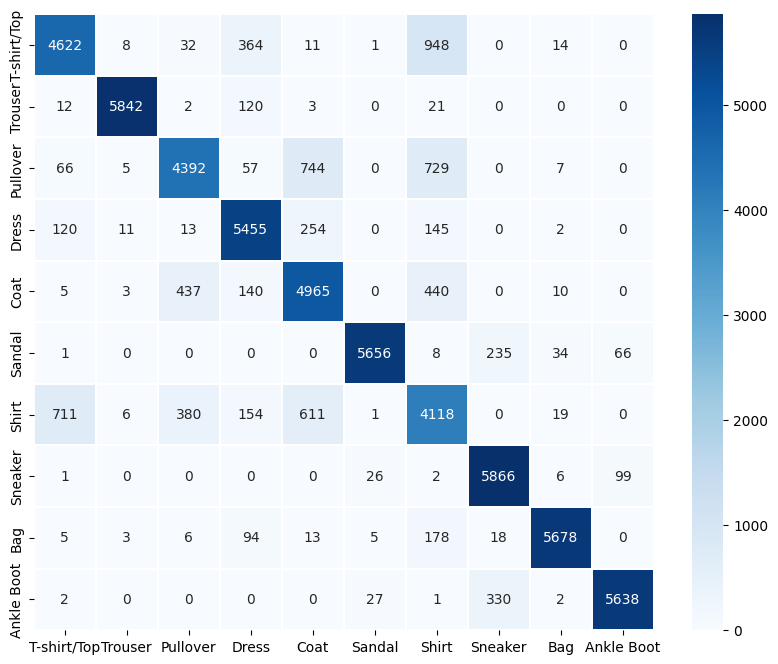

In [38]:
plt.figure( figsize=(10,8))
sb.heatmap( c , annot=True, fmt='d', linewidths=0.2,
        cmap='Blues',yticklabels=fclass, xticklabels=fclass )
plt.show()